Entrenar una red neuronal que dé la solución de las siguientes ecuaciones diferenciales en el el intervalo $[-5,5]$.  Graficar la solucion numérica junto con la solucion analıtica.

$ (a)\hspace{1cm} xy^\prime+y = x^2 \cos(x) \hspace{0.2cm}$  con $\hspace{0.2cm} y(0) = 0$

$ (b)\hspace{1cm} \frac{d^2y}{dx^2} = -y \hspace{0.2cm}$  con $ \hspace{0.2cm}y(0) = 1, \hspace{0.2cm} y(0) = -0.5 $

# $ (a)\hspace{1cm} xy^\prime+y = x^2 \cos(x) \hspace{0.2cm}$  con $\hspace{0.2cm} y(0) = 0$


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import math

In [8]:
class ODEsolver(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
    @property
    def metrics(self):
        return [self.loss_tracker]

    def train_step(self, data):
        batch_size=tf.shape(data)[0]
        x=tf.random.uniform((batch_size,1),minval=-5,maxval=5)
    
        with tf.GradientTape() as tape: 
            #Compute the loss value
            with tf.GradientTape() as tape2: 
                tape2.watch(x)
                y_pred = self(x, training=True)
            dy = tape2.gradient(y_pred, x)
            x_o = tf.zeros((batch_size, 1))
            y_o = self(x_o, training = True)
            eq = x*dy + y_pred-x**2*tf.cos(x)
            ic = y_o
            loss= keras.losses.mean_squared_error(0., eq) + keras.losses.mean_absolute_error(0., ic)
        # Apply grads
        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        # Update metrics
        self.loss_tracker.update_state(loss)
        # Return a dict mapping metric names to current value
        return {"loss": self.loss_tracker.result()}

In [27]:
model = ODEsolver()

model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='linear'))

In [28]:
model.summary()

Model: "od_esolver_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
 dense_15 (Dense)            (None, 10)                110       
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer = RMSprop(), metrics=['loss'])

x= tf.linspace(-5,5,100)
history = model.fit(x, epochs=3000, verbose=1)

x_testv = tf.linspace(-5,5,100)
a = model.predict(x_testv)

Epoch 1/3000
4/4 [==============================] - 1s 4ms/step - loss: 1.3691
Epoch 2/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0500
Epoch 3/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0609
Epoch 4/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0797
Epoch 5/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1356
Epoch 6/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0873
Epoch 7/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0239
Epoch 8/3000
4/4 [==============================] - 0s 3ms/step - loss: 1.2371
Epoch 9/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1037
Epoch 10/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0295
Epoch 11/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0322
Epoch 12/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0285
Epoch 13/3000
4/4 [==============================

4/4 [==============================] - 0s 3ms/step - loss: 0.1333
Epoch 104/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0402
Epoch 105/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.8794
Epoch 106/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0972
Epoch 107/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0541
Epoch 108/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0820
Epoch 109/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2917
Epoch 110/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0265
Epoch 111/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0243
Epoch 112/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0930
Epoch 113/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.3278
Epoch 114/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.5454
Epoch 115/3000
4/4 [========================

4/4 [==============================] - 0s 3ms/step - loss: 0.1518
Epoch 205/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1219
Epoch 206/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.6593
Epoch 207/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.3092
Epoch 208/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2011
Epoch 209/3000
4/4 [==============================] - 0s 0s/step - loss: 0.3117
Epoch 210/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0237
Epoch 211/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0187
Epoch 212/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1352
Epoch 213/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0487
Epoch 214/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1981
Epoch 215/3000
4/4 [==============================] - 0s 3ms/step - loss: 1.1619
Epoch 216/3000
4/4 [==========================

4/4 [==============================] - 0s 3ms/step - loss: 0.7982
Epoch 306/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2002
Epoch 307/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0286
Epoch 308/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1373
Epoch 309/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1757
Epoch 310/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0357
Epoch 311/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0645
Epoch 312/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.3507
Epoch 313/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2695
Epoch 314/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0420
Epoch 315/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2740
Epoch 316/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0622
Epoch 317/3000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 0.1912
Epoch 407/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1536
Epoch 408/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.6001
Epoch 409/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0534
Epoch 410/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.3017
Epoch 411/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1433
Epoch 412/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0387
Epoch 413/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0661
Epoch 414/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.4246
Epoch 415/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1517
Epoch 416/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1977
Epoch 417/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0699
Epoch 418/3000
4/4 [=======================

4/4 [==============================] - 0s 5ms/step - loss: 0.0633
Epoch 508/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0204
Epoch 509/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0694
Epoch 510/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2973
Epoch 511/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.3790
Epoch 512/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0874
Epoch 513/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.3296
Epoch 514/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0367
Epoch 515/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0447
Epoch 516/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2559
Epoch 517/3000
4/4 [==============================] - 0s 3ms/step - loss: 1.0347
Epoch 518/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1388
Epoch 519/3000
4/4 [========================

4/4 [==============================] - 0s 3ms/step - loss: 0.0251
Epoch 609/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1881
Epoch 610/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.5022
Epoch 611/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.8162
Epoch 612/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0593
Epoch 613/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0194
Epoch 614/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 615/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2972
Epoch 616/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0374
Epoch 617/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0708
Epoch 618/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1070
Epoch 619/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0207
Epoch 620/3000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 0.0219
Epoch 710/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.4865
Epoch 711/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.3011
Epoch 712/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0204
Epoch 713/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 714/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1340
Epoch 715/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.7632
Epoch 716/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0177
Epoch 717/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0328
Epoch 718/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0151
Epoch 719/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0912
Epoch 720/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0803
Epoch 721/3000
4/4 [=======================

4/4 [==============================] - 0s 5ms/step - loss: 0.7075
Epoch 811/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 812/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1936
Epoch 813/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 814/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0388
Epoch 815/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 816/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0194
Epoch 817/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.4500
Epoch 818/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1282
Epoch 819/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0811
Epoch 820/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.3155
Epoch 821/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0989
Epoch 822/3000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 0.2185
Epoch 912/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0304
Epoch 913/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.7476
Epoch 914/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.8502
Epoch 915/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0379
Epoch 916/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0649
Epoch 917/3000
4/4 [==============================] - 0s 515us/step - loss: 0.0460
Epoch 918/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0156
Epoch 919/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0121
Epoch 920/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0208
Epoch 921/3000
4/4 [==============================] - 0s 0s/step - loss: 0.1072
Epoch 922/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2547
Epoch 923/3000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 0.0596
Epoch 1013/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0114
Epoch 1014/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0449
Epoch 1015/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0615
Epoch 1016/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1529
Epoch 1017/3000
4/4 [==============================] - 0s 3ms/step - loss: 1.0602
Epoch 1018/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0404
Epoch 1019/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0760
Epoch 1020/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0762
Epoch 1021/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0825
Epoch 1022/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0582
Epoch 1023/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0419
Epoch 1024/3000
4/4 [==============

4/4 [==============================] - 0s 3ms/step - loss: 0.0369
Epoch 1113/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0693
Epoch 1114/3000
4/4 [==============================] - 0s 0s/step - loss: 0.4963
Epoch 1115/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0255
Epoch 1116/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2102
Epoch 1117/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0280
Epoch 1118/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.1705
Epoch 1119/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.4191
Epoch 1120/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0639
Epoch 1121/3000
4/4 [==============================] - 0s 0s/step - loss: 0.1692
Epoch 1122/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1010
Epoch 1123/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0284
Epoch 1124/3000
4/4 [=============

4/4 [==============================] - 0s 3ms/step - loss: 0.0232
Epoch 1213/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0768
Epoch 1214/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.7087
Epoch 1215/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.3207
Epoch 1216/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0288
Epoch 1217/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0294
Epoch 1218/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0194
Epoch 1219/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0576
Epoch 1220/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.1591
Epoch 1221/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.3279
Epoch 1222/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2498
Epoch 1223/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0891
Epoch 1224/3000
4/4 [============

4/4 [==============================] - 0s 3ms/step - loss: 0.1933
Epoch 1313/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0999
Epoch 1314/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0483
Epoch 1315/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1316/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0830
Epoch 1317/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0563
Epoch 1318/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0217
Epoch 1319/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0260
Epoch 1320/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1508
Epoch 1321/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2569
Epoch 1322/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0369
Epoch 1323/3000
4/4 [==============================] - 0s 0s/step - loss: 0.6250
Epoch 1324/3000
4/4 [=============

4/4 [==============================] - 0s 3ms/step - loss: 0.0581
Epoch 1413/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.3282
Epoch 1414/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.3807
Epoch 1415/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0208
Epoch 1416/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 1417/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1571
Epoch 1418/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.3901
Epoch 1419/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0329
Epoch 1420/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1582
Epoch 1421/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1924
Epoch 1422/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0321
Epoch 1423/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0505
Epoch 1424/3000
4/4 [============

4/4 [==============================] - 0s 0s/step - loss: 0.3085
Epoch 1513/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.4128
Epoch 1514/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1094
Epoch 1515/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0264
Epoch 1516/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2318
Epoch 1517/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.3333
Epoch 1518/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0118
Epoch 1519/3000
4/4 [==============================] - 0s 0s/step - loss: 0.1349
Epoch 1520/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.3730
Epoch 1521/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1942
Epoch 1522/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1389
Epoch 1523/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0203
Epoch 1524/3000
4/4 [=============

4/4 [==============================] - 0s 3ms/step - loss: 0.0236
Epoch 1613/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0458
Epoch 1614/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2013
Epoch 1615/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.5611
Epoch 1616/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 1617/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 1618/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 1619/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0712
Epoch 1620/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.3381
Epoch 1621/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.3262
Epoch 1622/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1281
Epoch 1623/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0483
Epoch 1624/3000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.0435
Epoch 1713/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.7501
Epoch 1714/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2923
Epoch 1715/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0890
Epoch 1716/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0776
Epoch 1717/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1908
Epoch 1718/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1206
Epoch 1719/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2389
Epoch 1720/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.4907
Epoch 1721/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0520
Epoch 1722/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2786
Epoch 1723/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.6242
Epoch 1724/3000
4/4 [============

4/4 [==============================] - 0s 2ms/step - loss: 0.4589
Epoch 1813/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0432
Epoch 1814/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2015
Epoch 1815/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2758
Epoch 1816/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1085
Epoch 1817/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2964
Epoch 1818/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0386
Epoch 1819/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0343
Epoch 1820/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0256
Epoch 1821/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0837
Epoch 1822/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.3626
Epoch 1823/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.4171
Epoch 1824/3000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 1913/3000
4/4 [==============================] - 0s 3ms/step - loss: 1.3161
Epoch 1914/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1237
Epoch 1915/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0210
Epoch 1916/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 1917/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0499
Epoch 1918/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0505
Epoch 1919/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0276
Epoch 1920/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2346
Epoch 1921/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1112
Epoch 1922/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0834
Epoch 1923/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1378
Epoch 1924/3000
4/4 [============

4/4 [==============================] - 0s 3ms/step - loss: 0.1027
Epoch 2013/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1200
Epoch 2014/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.3443
Epoch 2015/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0584
Epoch 2016/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 2017/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0612
Epoch 2018/3000
4/4 [==============================] - 0s 503us/step - loss: 0.1671
Epoch 2019/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0237
Epoch 2020/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.5236
Epoch 2021/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1338
Epoch 2022/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0458
Epoch 2023/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1410
Epoch 2024/3000
4/4 [=========

4/4 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 2113/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0300
Epoch 2114/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.5311
Epoch 2115/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1054
Epoch 2116/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0208
Epoch 2117/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 2118/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0200
Epoch 2119/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2215
Epoch 2120/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.3688
Epoch 2121/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1710
Epoch 2122/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1573
Epoch 2123/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1846
Epoch 2124/3000
4/4 [============

4/4 [==============================] - 0s 3ms/step - loss: 0.4379
Epoch 2213/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0596
Epoch 2214/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0243
Epoch 2215/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0452
Epoch 2216/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0259
Epoch 2217/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0599
Epoch 2218/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.4230
Epoch 2219/3000
4/4 [==============================] - 0s 0s/step - loss: 0.2797
Epoch 2220/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0649
Epoch 2221/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0114
Epoch 2222/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0274
Epoch 2223/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0251
Epoch 2224/3000
4/4 [============

4/4 [==============================] - 0s 0s/step - loss: 0.3588
Epoch 2313/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0272
Epoch 2314/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0728
Epoch 2315/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2509
Epoch 2316/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.7213
Epoch 2317/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0233
Epoch 2318/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0265
Epoch 2319/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0200
Epoch 2320/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.8975
Epoch 2321/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1250
Epoch 2322/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0445
Epoch 2323/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0324
Epoch 2324/3000
4/4 [=============

4/4 [==============================] - 0s 3ms/step - loss: 0.0135
Epoch 2413/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1442
Epoch 2414/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2731
Epoch 2415/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1989
Epoch 2416/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0327
Epoch 2417/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1352
Epoch 2418/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.7281
Epoch 2419/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2447
Epoch 2420/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0224
Epoch 2421/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0273
Epoch 2422/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0537
Epoch 2423/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.5681
Epoch 2424/3000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.0724
Epoch 2513/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1067
Epoch 2514/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0381
Epoch 2515/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.5030
Epoch 2516/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0630
Epoch 2517/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2557
Epoch 2518/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0250
Epoch 2519/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0511
Epoch 2520/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2201
Epoch 2521/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0886
Epoch 2522/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1288
Epoch 2523/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0740
Epoch 2524/3000
4/4 [============

4/4 [==============================] - 0s 3ms/step - loss: 0.0337
Epoch 2613/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0965
Epoch 2614/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.4389
Epoch 2615/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1735
Epoch 2616/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0506
Epoch 2617/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0441
Epoch 2618/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0955
Epoch 2619/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0200
Epoch 2620/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0722
Epoch 2621/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0827
Epoch 2622/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.5109
Epoch 2623/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.3637
Epoch 2624/3000
4/4 [============

4/4 [==============================] - 0s 3ms/step - loss: 0.4452
Epoch 2713/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2817
Epoch 2714/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0307
Epoch 2715/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0397
Epoch 2716/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0113
Epoch 2717/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0260
Epoch 2718/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.4791
Epoch 2719/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0537
Epoch 2720/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0349
Epoch 2721/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0642
Epoch 2722/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1723
Epoch 2723/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0632
Epoch 2724/3000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.1402
Epoch 2813/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0973
Epoch 2814/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2036
Epoch 2815/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2674
Epoch 2816/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0619
Epoch 2817/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0628
Epoch 2818/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0425
Epoch 2819/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2371
Epoch 2820/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.4419
Epoch 2821/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0718
Epoch 2822/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1139
Epoch 2823/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0150
Epoch 2824/3000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.0677
Epoch 2913/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0186
Epoch 2914/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 2915/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1125
Epoch 2916/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1948
Epoch 2917/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1938
Epoch 2918/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0644
Epoch 2919/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1366
Epoch 2920/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.4990
Epoch 2921/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0171
Epoch 2922/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 2923/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 2924/3000
4/4 [===========

La solución a esta ecuación diferencial es $y(x)=\frac{(x^2-2)sin(x)}{x}+2cos(x)$

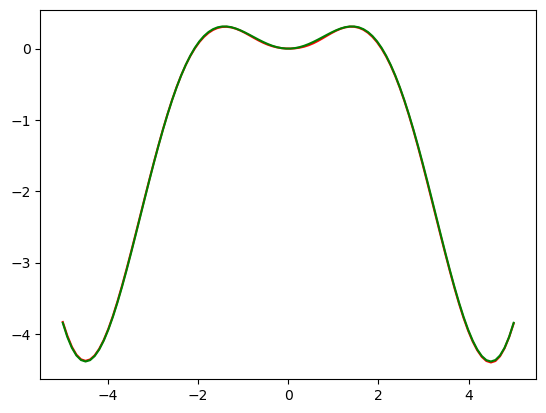

In [34]:
plt.plot(x_testv, a, color='red')
plt.plot(x_testv,((x**2-2)*np.sin(x))/(x)+2*np.cos(x), color= 'green')
plt.show()

# $ (b)\hspace{1cm} \frac{d^2y}{dx^2} = -y \hspace{0.2cm}$  con $ \hspace{0.2cm}y(0) = 1, \hspace{0.2cm} yprime\(0) = -0.5 $

In [67]:
class ODEsolver(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        
    @property
    def metrics(self):
        return [self.loss_tracker]
    
    def train_step(self, data):
        batch_size = tf.shape(data)[0]
        x = tf.random.uniform((batch_size,1), minval= -5, maxval= 5)
        x_0 = tf.zeros((batch_size,1))

        with tf.GradientTape() as tape:
            #Compute the loss value
            with tf.GradientTape(persistent=True) as g:
                g.watch(x)
                g.watch(x_0)

                with tf.GradientTape() as gg:
                    gg.watch(x)    
                    y_pred = self(x, training=True)
                y_x = gg.gradient(y_pred,x)
                y_0 = self(x_0, training=True)

            ddy = g.gradient(y_x, x)
            dy_xo = g.gradient(y_0,x_0)
            eq = ddy + y_pred
            ic = y_0 - 1.0 
            ic1 = dy_xo + 0.5
            loss = keras.losses.mean_squared_error(0., eq) + keras.losses.mean_squared_error(0., ic) + keras.losses.mean_squared_error(0., ic1)

        # Apply grads
        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        # Update metrics
        self.loss_tracker.update_state(loss)
        # Return a dict mapping metric names to current value
        return {"loss": self.loss_tracker.result()}

In [68]:
model = ODEsolver()

model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))

model.add(Dense(1, activation='linear'))

In [69]:
model.summary()

Model: "od_esolver_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 10)                20        
                                                                 
 dense_41 (Dense)            (None, 10)                110       
                                                                 
 dense_42 (Dense)            (None, 10)                110       
                                                                 
 dense_43 (Dense)            (None, 1)                 11        
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.compile(optimizer = RMSprop(), metrics=['loss'])

x= tf.linspace(-5,5,100)
history = model.fit(x, epochs=3000, verbose=1)

x_testv = tf.linspace(-5,5,100)
a = model.predict(x_testv)

Epoch 1/3000
4/4 [==============================] - 1s 2ms/step - loss: 0.0438
Epoch 2/3000
4/4 [==============================] - 0s 2ms/step - loss: 9.9040e-04
Epoch 3/3000
4/4 [==============================] - 0s 2ms/step - loss: 7.4708e-04
Epoch 4/3000
4/4 [==============================] - 0s 2ms/step - loss: 9.4595e-04
Epoch 5/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 6/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 7/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 8/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 9/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 10/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0086
Epoch 11/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 12/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 13/3000
4/4 [==================

4/4 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 104/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 105/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 106/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 107/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0139
Epoch 108/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 109/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 110/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 111/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 112/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 113/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 114/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 115/3000
4/4 [=======================

Epoch 204/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 205/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 206/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 207/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 208/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 209/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 210/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 211/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 212/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 213/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0175
Epoch 214/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 215/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 216/3000
4/4 [========

4/4 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 305/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 306/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 307/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 308/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 309/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 310/3000
4/4 [==============================] - 0s 3ms/step - loss: 7.1189e-04
Epoch 311/3000
4/4 [==============================] - 0s 2ms/step - loss: 7.6678e-04
Epoch 312/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 313/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 314/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 315/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 316/3000
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 405/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 406/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 407/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 408/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 409/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 410/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 411/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 412/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 413/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 414/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 415/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 416/3000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 6.1638e-04
Epoch 505/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 506/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0131
Epoch 507/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 508/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 509/3000
4/4 [==============================] - 0s 2ms/step - loss: 8.5469e-04
Epoch 510/3000
4/4 [==============================] - 0s 2ms/step - loss: 3.0248e-04
Epoch 511/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 512/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 513/3000
4/4 [==============================] - 0s 3ms/step - loss: 6.3783e-04
Epoch 514/3000
4/4 [==============================] - 0s 2ms/step - loss: 8.6325e-04
Epoch 515/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 516/3000
4/4 [===

4/4 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 605/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 606/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 607/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 608/3000
4/4 [==============================] - 0s 2ms/step - loss: 7.4401e-04
Epoch 609/3000
4/4 [==============================] - 0s 2ms/step - loss: 5.5195e-04
Epoch 610/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 611/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 612/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 613/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 614/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 615/3000
4/4 [==============================] - 0s 2ms/step - loss: 5.0522e-04
Epoch 616/3000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 8.7197e-04
Epoch 705/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 706/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 707/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 708/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 709/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 710/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 711/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 712/3000
4/4 [==============================] - 0s 2ms/step - loss: 4.6597e-04
Epoch 713/3000
4/4 [==============================] - 0s 2ms/step - loss: 5.9095e-04
Epoch 714/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 715/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 716/3000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 7.9504e-04
Epoch 805/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 806/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 807/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 808/3000
4/4 [==============================] - 0s 2ms/step - loss: 6.0433e-04
Epoch 809/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 810/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 811/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 812/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 813/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 814/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 815/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 816/3000
4/4 [===============

4/4 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 905/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 906/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 907/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 908/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 909/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 910/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 911/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 912/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 913/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 914/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 915/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 916/3000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 1005/3000
4/4 [==============================] - 0s 2ms/step - loss: 6.7741e-04
Epoch 1006/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 1007/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 1008/3000
4/4 [==============================] - 0s 706us/step - loss: 0.0032
Epoch 1009/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 1010/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 1011/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 1012/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 1013/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 1014/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 1015/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 1016/3000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 1104/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0016
Epoch 1105/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0048
Epoch 1106/3000
4/4 [==============================] - 0s 7ms/step - loss: 0.0054
Epoch 1107/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 1108/3000
4/4 [==============================] - 0s 2ms/step - loss: 6.5398e-04
Epoch 1109/3000
4/4 [==============================] - 0s 0s/step - loss: 9.3739e-04
Epoch 1110/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0043
Epoch 1111/3000
4/4 [==============================] - 0s 6ms/step - loss: 0.0097
Epoch 1112/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1113/3000
4/4 [==============================] - 0s 4ms/step - loss: 6.9540e-04
Epoch 1114/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 1115/3000
4/4 [==

4/4 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 1203/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 1204/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 1205/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 1206/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 1207/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 1208/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 1209/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0019
Epoch 1210/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1211/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 1212/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 1213/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 1214/3000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 1302/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 1303/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 1304/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 1305/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 1306/3000
4/4 [==============================] - 0s 2ms/step - loss: 4.4969e-04
Epoch 1307/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 1308/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 1309/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 1310/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 1311/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 1312/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 1313/3000
4/4 [=======

4/4 [==============================] - 0s 5ms/step - loss: 0.0048
Epoch 1401/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0027
Epoch 1402/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0033
Epoch 1403/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0109
Epoch 1404/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 1405/3000
4/4 [==============================] - 0s 1ms/step - loss: 6.4567e-04
Epoch 1406/3000
4/4 [==============================] - 0s 0s/step - loss: 8.7611e-04
Epoch 1407/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0048
Epoch 1408/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0072
Epoch 1409/3000
4/4 [==============================] - 0s 0s/step - loss: 6.5288e-04
Epoch 1410/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 1411/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 1412/3000
4/4 [====

Epoch 1499/3000
4/4 [==============================] - 0s 2ms/step - loss: 4.7613e-04
Epoch 1500/3000
4/4 [==============================] - 0s 2ms/step - loss: 8.4810e-04
Epoch 1501/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 1502/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 1503/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 1504/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1505/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 1506/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 1507/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 1508/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 1509/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 1510/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 15

4/4 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 1599/3000
4/4 [==============================] - 0s 2ms/step - loss: 7.8316e-04
Epoch 1600/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 1601/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 1602/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 1603/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 1604/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 1605/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 1606/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 1607/3000
4/4 [==============================] - 0s 2ms/step - loss: 4.9898e-04
Epoch 1608/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 1609/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 1610/3000
4/4 [===

4/4 [==============================] - 0s 0s/step - loss: 0.0017 
Epoch 1697/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0084
Epoch 1698/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0026
Epoch 1699/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0033
Epoch 1700/3000
4/4 [==============================] - 0s 7ms/step - loss: 0.0044
Epoch 1701/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 1702/3000
4/4 [==============================] - 0s 332us/step - loss: 0.0030
Epoch 1703/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0039
Epoch 1704/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 1705/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 1706/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0018
Epoch 1707/3000
4/4 [==============================] - 0s 0s/step - loss: 0.0015 
Epoch 1708/3000
4/4 [=============

4/4 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 1796/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 1797/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 1798/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 1799/3000
4/4 [==============================] - 0s 665us/step - loss: 4.8675e-04
Epoch 1800/3000
4/4 [==============================] - 0s 2ms/step - loss: 7.0658e-04
Epoch 1801/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 1802/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0139
Epoch 1803/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1804/3000
4/4 [==============================] - 0s 3ms/step - loss: 6.1702e-04
Epoch 1805/3000
4/4 [==============================] - 0s 2ms/step - loss: 7.1782e-04
Epoch 1806/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1807/300

4/4 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 1894/3000
4/4 [==============================] - 0s 3ms/step - loss: 9.3685e-04
Epoch 1895/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 1896/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 1897/3000
4/4 [==============================] - 0s 2ms/step - loss: 4.3347e-04
Epoch 1898/3000
4/4 [==============================] - 0s 2ms/step - loss: 6.7474e-04
Epoch 1899/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1900/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 1901/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 1902/3000
4/4 [==============================] - 0s 3ms/step - loss: 4.3254e-04
Epoch 1903/3000
4/4 [==============================] - 0s 2ms/step - loss: 3.1172e-04
Epoch 1904/3000
4/4 [==============================] - 0s 2ms/step - loss: 5.9590e-04
Epoch 19

4/4 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 1992/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 1993/3000
4/4 [==============================] - 0s 2ms/step - loss: 8.0486e-04
Epoch 1994/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 1995/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 1996/3000
4/4 [==============================] - 0s 3ms/step - loss: 5.8875e-04
Epoch 1997/3000
4/4 [==============================] - 0s 2ms/step - loss: 7.5130e-04
Epoch 1998/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 1999/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 2000/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 2001/3000
4/4 [==============================] - 0s 2ms/step - loss: 9.5442e-04
Epoch 2002/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 2003/3000


4/4 [==============================] - 0s 3ms/step - loss: 6.5166e-04
Epoch 2090/3000
4/4 [==============================] - 0s 2ms/step - loss: 4.5375e-04
Epoch 2091/3000
4/4 [==============================] - 0s 2ms/step - loss: 7.3957e-04
Epoch 2092/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 2093/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 2094/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 2095/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 2096/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 2097/3000
4/4 [==============================] - 0s 2ms/step - loss: 5.0068e-04
Epoch 2098/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 2099/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 2100/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 2101/3000


4/4 [==============================] - 0s 2ms/step - loss: 9.9216e-04
Epoch 2188/3000
4/4 [==============================] - 0s 2ms/step - loss: 3.2992e-04
Epoch 2189/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 2190/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0129
Epoch 2191/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 2192/3000
4/4 [==============================] - 0s 2ms/step - loss: 2.7748e-04
Epoch 2193/3000
4/4 [==============================] - 0s 2ms/step - loss: 4.2921e-04
Epoch 2194/3000
4/4 [==============================] - 0s 2ms/step - loss: 6.4522e-04
Epoch 2195/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 2196/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 2197/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 2198/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 2199/3

4/4 [==============================] - 0s 2ms/step - loss: 8.1352e-04
Epoch 2286/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 2287/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 2288/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 2289/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 2290/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 2291/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 2292/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 2293/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 2294/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 2295/3000
4/4 [==============================] - 0s 2ms/step - loss: 3.2976e-04
Epoch 2296/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 2297/3000
4/4 [===

4/4 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 2384/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 2385/3000
4/4 [==============================] - 0s 3ms/step - loss: 7.7004e-04
Epoch 2386/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 2387/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 2388/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 2389/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 2390/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 2391/3000
4/4 [==============================] - 0s 2ms/step - loss: 4.0930e-04
Epoch 2392/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 2393/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0065
Epoch 2394/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 2395/3000
4/4 [===

4/4 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 2482/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 2483/3000
4/4 [==============================] - 0s 2ms/step - loss: 4.2628e-04
Epoch 2484/3000
4/4 [==============================] - 0s 2ms/step - loss: 4.3978e-04
Epoch 2485/3000
4/4 [==============================] - 0s 2ms/step - loss: 8.1343e-04
Epoch 2486/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 2487/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 2488/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 2489/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 2490/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 2491/3000
4/4 [==============================] - 0s 2ms/step - loss: 8.1264e-04
Epoch 2492/3000
4/4 [==============================] - 0s 2ms/step - loss: 3.5739e-04
Epoch 2493/3

4/4 [==============================] - 0s 2ms/step - loss: 9.0458e-04
Epoch 2580/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 2581/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 2582/3000
4/4 [==============================] - 0s 2ms/step - loss: 5.4390e-04
Epoch 2583/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 2584/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 2585/3000
4/4 [==============================] - 0s 3ms/step - loss: 3.7965e-04
Epoch 2586/3000
4/4 [==============================] - 0s 3ms/step - loss: 5.2614e-04
Epoch 2587/3000
4/4 [==============================] - 0s 2ms/step - loss: 8.1013e-04
Epoch 2588/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 2589/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 2590/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 2591/3

4/4 [==============================] - 0s 3ms/step - loss: 3.7306e-04
Epoch 2678/3000
4/4 [==============================] - 0s 2ms/step - loss: 4.2536e-04
Epoch 2679/3000
4/4 [==============================] - 0s 2ms/step - loss: 3.9561e-04
Epoch 2680/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 2681/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 2682/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 2683/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 2684/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 2685/3000
4/4 [==============================] - 0s 2ms/step - loss: 5.4794e-04
Epoch 2686/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 2687/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 2688/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 2689/3000


4/4 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 2776/3000
4/4 [==============================] - 0s 2ms/step - loss: 4.7576e-04
Epoch 2777/3000
4/4 [==============================] - 0s 3ms/step - loss: 7.3834e-04
Epoch 2778/3000
4/4 [==============================] - 0s 2ms/step - loss: 6.9129e-04
Epoch 2779/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 2780/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 2781/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 2782/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 2783/3000
4/4 [==============================] - 0s 2ms/step - loss: 8.1459e-04
Epoch 2784/3000
4/4 [==============================] - 0s 2ms/step - loss: 1.8578e-04
Epoch 2785/3000
4/4 [==============================] - 0s 2ms/step - loss: 5.1617e-04
Epoch 2786/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 27

4/4 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 2874/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 2875/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 2876/3000
4/4 [==============================] - 0s 2ms/step - loss: 3.2190e-04
Epoch 2877/3000
4/4 [==============================] - 0s 2ms/step - loss: 6.9619e-04
Epoch 2878/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 2879/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 2880/3000
4/4 [==============================] - 0s 2ms/step - loss: 3.9029e-04
Epoch 2881/3000
4/4 [==============================] - 0s 2ms/step - loss: 1.9407e-04
Epoch 2882/3000
4/4 [==============================] - 0s 2ms/step - loss: 3.2302e-04
Epoch 2883/3000
4/4 [==============================] - 0s 2ms/step - loss: 6.4060e-04
Epoch 2884/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 28

4/4 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 2972/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 2973/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 2974/3000
4/4 [==============================] - 0s 3ms/step - loss: 9.3092e-04
Epoch 2975/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 2976/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 2977/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 2978/3000
4/4 [==============================] - 0s 2ms/step - loss: 4.1063e-04
Epoch 2979/3000
4/4 [==============================] - 0s 2ms/step - loss: 2.0984e-04
Epoch 2980/3000
4/4 [==============================] - 0s 3ms/step - loss: 1.6861e-04
Epoch 2981/3000
4/4 [==============================] - 0s 3ms/step - loss: 4.9357e-04
Epoch 2982/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 2983/3

La solución a esta ecuación es $y(x)=cos(x)-0.5sin(x)$

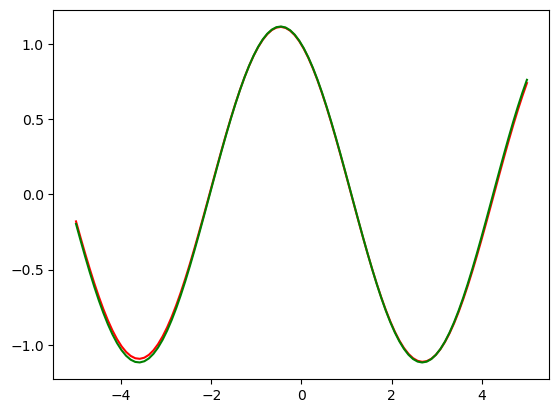

In [73]:
plt.plot(x_testv, a, color='red')
plt.plot(x_testv,np.cos(x)-0.5*np.sin(x), color= 'green')
plt.show()